In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import scikit_posthocs as sp
from matplotlib.ticker import PercentFormatter
from math import sqrt
from statistics import mean, stdev
from matplotlib.ticker import PercentFormatter
from statsmodels.stats.power import TTestPower, TTestIndPower
import pymaid
import matplotlib.font_manager as fm
from statannot import add_stat_annotation

#connect your catmaid instance
instance=pymaid.CatmaidInstance('https://radagast.hms.harvard.edu/catmaidaedes',"")

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)


In [2]:
import matplotlib
print(matplotlib.matplotlib_fname())

/home/jb534/miniconda3/envs/wuzzy/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


In [3]:
MD1OSNs = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1osns=pymaid.get_neuron(MD1OSNs)
dfmd1 = pymaid.adjacency_matrix(MD1OSNs, targets=295)
md1list=dfmd1.values.tolist()
import itertools
md1biglist=(list(itertools.chain.from_iterable(md1list)))
print(md1biglist)
print(MD1OSNs)


Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

[160, 158, 131, 113, 115, 155, 145, 184, 151, 89, 132]
[7172, 7815, 1608, 873, 6736, 881, 6975, 324409, 953, 5021, 671]


In [4]:
pymaid.adjacency_matrix(5021, targets=295)

targets,295
sources,
5021,89


In [5]:
MD2OSNs = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2osns=pymaid.get_neuron(MD2OSNs)
dfmd2 = pymaid.adjacency_matrix(MD2OSNs, targets=690)
md2list=dfmd2.values.tolist()
md2biglist=(list(itertools.chain.from_iterable(md2list)))
print(md2biglist)
print(MD2OSNs)


INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

[103, 112, 100, 111, 95, 112, 117, 103, 114, 51]
[9064, 7209, 718, 7983, 947, 7325, 728, 7353, 7197, 7135]


In [6]:
MD3OSNs = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3osns=pymaid.get_neuron(MD3OSNs)
dfmd3 = pymaid.adjacency_matrix(MD3OSNs, targets=11126)
md3list=dfmd3.values.tolist()
md3biglist=(list(itertools.chain.from_iterable(md3list)))
print(md3biglist)

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

[151, 163, 137, 179, 142, 147, 146, 156, 166, 154]


In [7]:
#make dataframe

data_dict = {"1": md1biglist, "2": md2biglist, "3": md3biglist}
pre_df = {"Glomerulus": [], "OSN → uPN synapses": []}
for glom, dists in data_dict.items():
    glom_list = [glom,]*len(dists)
    pre_df["Glomerulus"].extend(glom_list)    
    pre_df["OSN → uPN synapses"].extend(dists)

df = pd.DataFrame.from_dict(pre_df)
df

,Glomerulus,OSN → uPN synapses
0,1,160
1,1,158
2,1,131
3,1,113
4,1,115
5,1,155
6,1,145
7,1,184
8,1,151
9,1,89


In [8]:
from seaborn.categorical import _ViolinPlotter
class MyVPlot(_ViolinPlotter):
    def draw_quartiles(self, ax, data, support, density, center, split=False, color='k'):
        """Draw the quartiles as lines at width of density."""
        q50 = np.mean(data)
        self.draw_to_density(ax, center, q50, support, density, split,
                             linewidth=self.linewidth, color=color)

def my_violinplot2(x=None, y=None, hue=None, data=None, order=None, hue_order=None,
                  bw="scott", cut=0, scale="area", scale_hue=True, gridsize=100,
                  width=.8, inner="quartiles", split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=.75,alpha=1,
                  ax=None, edgecolor=None, **kwargs):

    plotter = MyVPlot(x, y, hue, data, order, hue_order,
                      bw, cut, scale, scale_hue, gridsize,
                      width, inner, split, dodge, orient, linewidth,
                      color, palette, saturation)
    if ax is None:
        ax = plt.gca()

    plotter.plot(ax)
    # change outlines
    colors=["violet", "#0000FF", 'mediumspringgreen']
    for idx, violin in enumerate(ax.collections):
        violin.set_edgecolor(colors[idx])
    for l in ax.lines:
        l.set_linestyle('-')
        l.set_color('k')
    return ax

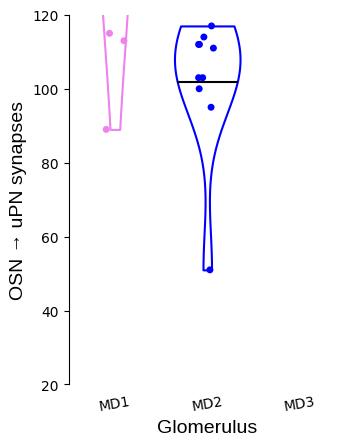

In [9]:
ax = my_violinplot2(data=[md1biglist, md2biglist, md3biglist], color = "1")
ax = sns.stripplot(data=[md1biglist, md2biglist, md3biglist], palette=["violet", "#0000FF", "mediumspringgreen"])
labels = ['MD1', 'MD2', 'MD3']
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
ax.set_aspect(0.04)
plt.ylim([20,120])
ax.set_xticklabels(labels,rotation = 10)
ax.set_xlabel('Glomerulus', size=14, fontname="Liberation Sans")
ax.set_ylabel('OSN → uPN synapses', size=14, fontname="Liberation Sans")
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/feedforward.svg', format="svg")
plt.show()



/tmp/ipykernel_35660/2792385832.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])


1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.241e-03 U_stat=9.800e+01
2 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.419e-04 U_stat=0.000e+00
1 v.s. 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.145e-01 U_stat=3.650e+01


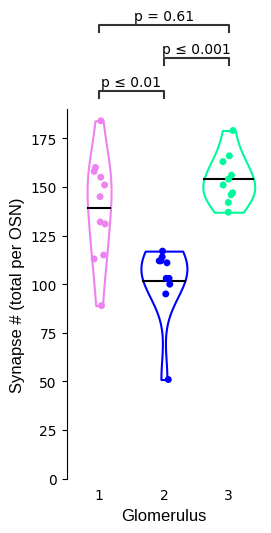

In [10]:
#make plot with annotations, from dataframe
x = "Glomerulus"
y = "OSN → uPN synapses"
order = ['1', '2', '3']
ax = my_violinplot2(data=df, x=x, y=y, order=order, color="1")
ax = sns.stripplot(data=df, x=x, y=y, order=order, palette=["violet", "#0000FF", "mediumspringgreen"])
ax.set_xlabel('Glomerulus', size=12, fontname="Liberation Sans")
ax.set_ylabel('Synapse # (total per OSN)', size=12, fontname="Liberation Sans")
ax.set_aspect(0.03)
plt.ylim(0,190)
plt.tick_params(axis='x', which='both', bottom=False, top=False)
plt.tick_params(axis='y', which='both', left=True, right=False)
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
add_stat_annotation(ax, data=df, x=x, y=y, order=order,
                    box_pairs=[("1", "2"), ("1", "3"), ("2", "3")],
                    test='Mann-Whitney', text_format='simple', loc='outside', verbose=2)
plt.savefig('/home/jb534/pymaid_scripts/aedes/aedes/svg/feedforward.svg', format="svg")
plt.show()

In [11]:
stats.kruskal(md1biglist, md2biglist, md3biglist)


KruskalResult(statistic=16.808874502540025, pvalue=0.0002238717418171187)

In [12]:
print(np.mean(md1biglist))
print(np.std(md1biglist))
print(np.mean(md2biglist))
print(np.std(md2biglist))
print(np.mean(md3biglist))
print(np.std(md3biglist))

139.36363636363637
25.453246720114926
101.8
18.18130908378162
154.1
11.869709347747316


In [14]:
sp.posthoc_dunn([md1biglist, md2biglist, md3biglist], p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.011104,0.733278
2,0.011104,1.000000,0.000213
3,0.733278,0.000213,1.000000


In [ ]:
#total feedforward synapses onto each uPN
MD1OSNs_all = pymaid.get_skids_by_annotation(['innervates MD1', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD1osnsall=pymaid.get_neuron(MD1OSNs_all)
dfmd1 = pymaid.adjacency_matrix(MD1OSNs_all, targets=295)
md1listall=dfmd1.values.tolist()
md1biglistall=(list(itertools.chain.from_iterable(md1listall)))
print(md1biglistall)
print(sum(md1biglistall))

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/11 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/11 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[160, 158, 131, 113, 115, 155, 145, 184, 151, 89, 132]
1533


In [ ]:
#total feedforward synapses onto each uPN
MD2OSNs_all = pymaid.get_skids_by_annotation(['innervates MD2', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD2osnsall=pymaid.get_neuron(MD2OSNs_all)
dfmd2all = pymaid.adjacency_matrix(MD2OSNs_all, targets=690)
md2listall=dfmd2all.values.tolist()
md2biglistall=(list(itertools.chain.from_iterable(md2listall)))
print(md2biglistall)
print(sum(md2biglistall))

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[103, 112, 100, 111, 95, 112, 117, 103, 114, 51]
1018


In [ ]:
#total feedforward synapses onto each uPN
MD3OSNs_all = pymaid.get_skids_by_annotation(['innervates MD3', 'left palp nerve', 'sensory neuron', 'PSPs done'], allow_partial = False, intersect = True)
MD3osnsall=pymaid.get_neuron(MD3OSNs_all)
dfmd3all = pymaid.adjacency_matrix(MD3OSNs_all, targets=11126)
md3listall=dfmd3all.values.tolist()
md3biglistall=(list(itertools.chain.from_iterable(md3listall)))
print(md3biglistall)
print(sum(md3biglistall))

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Fetch neurons:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)
INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


Make nrn:   0%|          | 0/10 [00:00<?, ?it/s]

INFO  : Cached data used. Use `pymaid.clear_cache()` to clear. (pymaid)


[152, 158, 132, 174, 140, 143, 143, 151, 163, 150]
1506


In [ ]:
#Power analysis

#find cohen's effect size
cohens_d = (mean(md1biglist) - mean(md2biglist)) / (sqrt((stdev(md1biglist) ** 2 + stdev(md2biglist) ** 2) / 2))
print(cohens_d)

# perform power analysis to find sample size for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=cohens_d, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

1.2328978266286221
Sample size/Number needed in each group: 11.373
